Saving twitter_training.csv to twitter_training (2).csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-3-4284339608.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


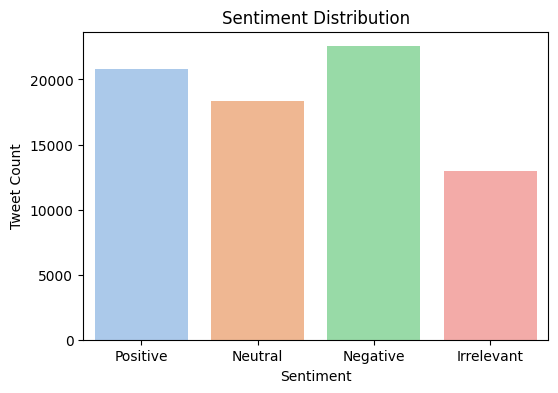

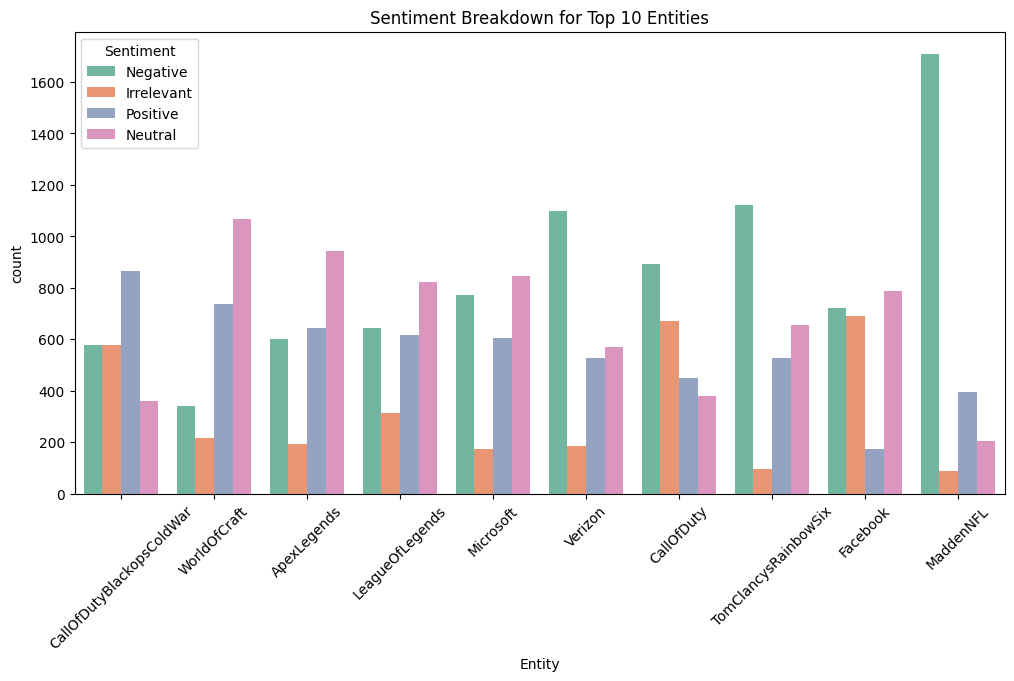

📊 Sentiment Classification Report:

              precision    recall  f1-score   support

    Negative       0.76      0.76      0.76      4509
     Neutral       0.65      0.66      0.65      3650
    Positive       0.74      0.73      0.73      4180

    accuracy                           0.72     12339
   macro avg       0.71      0.71      0.71     12339
weighted avg       0.72      0.72      0.72     12339



In [3]:

!pip install nltk wordcloud scikit-learn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from google.colab import files


uploaded = files.upload()  # Upload twitter_training.csv when prompted

df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()


nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)                 # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)              # Remove special characters
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['Cleaned'] = df['Tweet'].astype(str).apply(clean_text)
df[['Tweet', 'Cleaned']].head()


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


# Join cleaned tweets by sentiment
pos = " ".join(df[df.Sentiment.str.lower() == 'positive']['Cleaned'])
neg = " ".join(df[df.Sentiment.str.lower() == 'negative']['Cleaned'])

# WordCloud for positive sentiment
WordCloud(width=800, height=400).generate(pos).to_image()
# WordCloud for negative sentiment
WordCloud(width=800, height=400, background_color='black').generate(neg).to_image()


top_entities = df['Entity'].value_counts().head(10).index
subset = df[df['Entity'].isin(top_entities)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='Entity', hue='Sentiment', palette='Set2')
plt.title("Sentiment Breakdown for Top 10 Entities")
plt.xticks(rotation=45)
plt.show()


# Filter only positive, negative, and neutral
filtered = df[df['Sentiment'].str.lower().isin(['positive', 'negative', 'neutral'])]

X = filtered['Cleaned']
y = filtered['Sentiment']

# Convert text to numbers
vectorizer = TfidfVectorizer(max_features=3000)
X_vector = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("📊 Sentiment Classification Report:\n")
print(classification_report(y_test, y_pred))
